# Fashion Classification (CNN)

<img src='https://static.vecteezy.com/ti/gratis-vector/p1/26107946-hand-getrokken-kleding-schoenen-en-accessoires-voor-dames-groot-reeks-van-ondergoed-schoenen-jassen-tassen-hoeden-in-gewoontjes-stijl-vlak-grafisch-illustraties-geisoleerd-aan-wit-achtergrond-vector.jpg'>

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

<a href=https://www.kaggle.com/datasets/zalando-research/fashionmnist>Fashion Mnist Dataset -  Veri setine buradan ulaşabilirsiniz</a>

---



Ben Keras kütüphanesinde hazır olarak bulununan veri setini kullandım.

Bu projede amacım  CNN ile sınıflandırma modeli oluşturmak ve başarı oranımı %90 nın üstüne getirmektir.

## Libraries - Kütüphaneler

In [2]:
from tensorflow.keras.models import Sequential # Derin öğrenme modeli oluşturmak için kullanacağım.
from tensorflow.keras.layers import Dense, Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten, Dropout, BatchNormalization

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns # Görselleştirme için kullanacağım.
import tensorflow as tf
import matplotlib.pyplot as plt # Data Visulation
from tensorflow import keras # Veriyi yüklemek için kullanacağım.
import numpy as np

## Reading Data - Veriyi Okuma

In [3]:
fashion = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Explraty Data Anlaysis - EDA -Keşifsel Veri Analizi

Veriyi tanıyoruz

In [4]:
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
y_train.shape

(60000,)

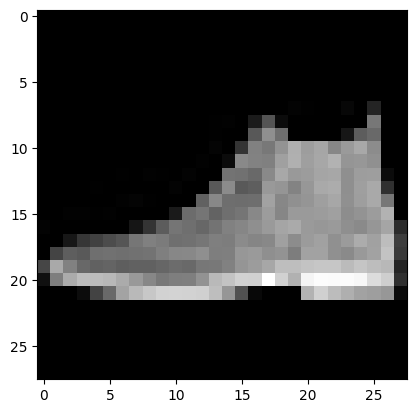

In [6]:
plt.imshow(x_test[0],cmap='gray')

## Veri Normalizasyonu

In [7]:
# Resimleri, bir derin öğrenme modelinde (genellikle bir konvolüsyonel sinir ağı - CNN) kullanılmak üzere dönüştürdüm.

In [8]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [9]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [10]:
x_train=x_train/255.0
x_test=x_test/255.0

In [11]:
# Yukarıdaki kodda ,resimlerin 0–255 aralığından 0–1 aralığına dönüştürülerek modelin daha hızlı ve stabil öğrenmesi sağladım.

## Modelling

In [12]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5)) ## Sinir ağınin aşırı öğrenmesini (overfitting) engeller ve modelin genel performansını iyileştirir.
model.add(Dense(10, activation='softmax')) # softmax çoklu sınıflandırmalarda kullanılır.
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=12,verbose=1,batch_size=32)

Epoch 1/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 440s 232ms/step - accuracy: 0.7371 - loss: 0.7506 - val_accuracy: 0.8665 - val_loss: 0.3648
Epoch 2/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 446s 235ms/step - accuracy: 0.8700 - loss: 0.3665 - val_accuracy: 0.8928 - val_loss: 0.3023
Epoch 3/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 444s 236ms/step - accuracy: 0.8912 - loss: 0.3113 - val_accuracy: 0.8884 - val_loss: 0.3136
Epoch 4/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 443s 236ms/step - accuracy: 0.8999 - loss: 0.2833 - val_accuracy: 0.9033 - val_loss: 0.2848
Epoch 5/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 440s 235ms/step - accuracy: 0.9090 - loss: 0.2684 - val_accuracy: 0.8900 - val_loss: 0.3215
Epoch 6/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 437s 233ms/step - accuracy: 0.9119 - loss: 0.2499 - val_accuracy: 0.9099 - val_loss: 0.2653
Epoch 7/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 444s 234ms/step - accuracy: 0.9166 - loss: 0.2345 - val_accuracy: 0.9044 - val_loss: 0.2746
Epoch 8/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 444s 237ms/step - ac

In [14]:
model.summary() # mOdel katmanlarını gösterir.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,149,600 (19.64 MB)

 Trainable params: 1,716,234 (6.55 MB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 3,432,470 (13.09 MB)

## Tahmin ve Veri Görselleştirme

In [15]:
history.history['accuracy'][-1]
# Başarı(Doğruluk) oranını gösterdim.

0.9329833388328552

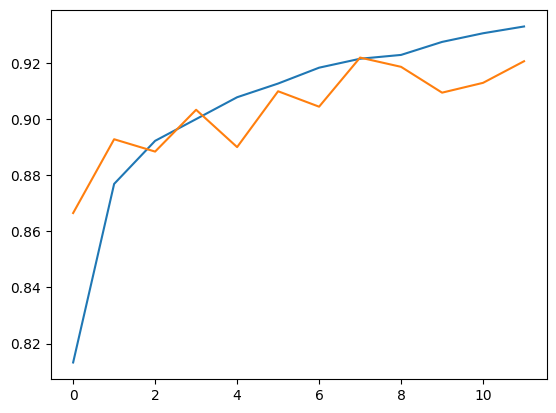

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [17]:
class_names = [str(i) for i in range(10)]

#### Class_names
0 = T-shirt/top

1 = Trouser

2 = Pullover

3 = Dress

4 = Coat

5 = Sandal

6 = Shirt

7 = Sneaker

8 = Bag

9 = Ankle boot

313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step


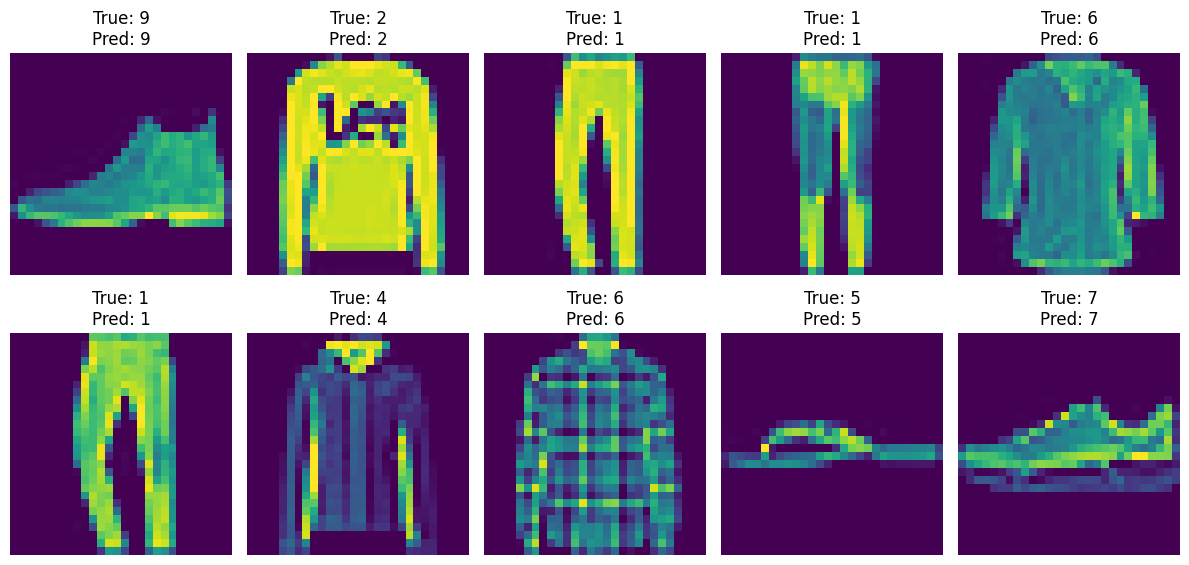

In [19]:
# Test seti için modelin tahminlerini aldım.
predictions = model.predict(x_test)

# Öngörülen sınıf isimlerini aldık.
predicted_classes = np.argmax(predictions, axis=1)

# Verileri test ediyoruz.
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i])
    true_label = class_names[int(y_test[i])]
    predicted_label = class_names[predicted_classes[i]]
    plt.title(f"True: {true_label}\nPred: {predicted_label}")
    plt.axis("off")
plt.tight_layout()
plt.show()

In [20]:
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step


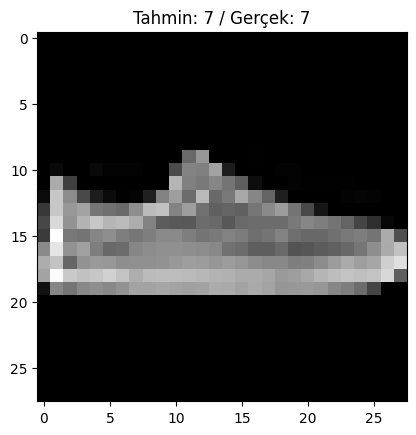

In [21]:
i = 12
plt.imshow(x_test[i].reshape(28,28), cmap="gray")
plt.title("Tahmin: " + class_names[y_pred_classes[i]] + " / Gerçek: " + class_names[y_test[i]])
plt.show()

## Modeli Kaydetme

In [22]:
model.save('fashion(cnn)-Classification.h5')

## Sonuç - Conclusion

Sonuç olarak bu projede:

+ Veri Setinin Yüklenmesi:
Fashion-MNIST veri seti Keras kütüphanesi kullanılarak projeye dahil edilmiştir.

+ Verinin İncelenmesi:
Eğitim ve test verileri tanıtılmış, veri boyutları ve örnek görüntüler incelenerek veri setinin genel yapısı anlaşılmıştır.

+ Verinin CNN Modeli İçin Hazırlanması:
Görüntüler normalize edilmiş, gerekli şekil dönüşümleri yapılarak CNN mimarisine uygun hale getirilmiştir.

+ Modelin Oluşturulması:
Convolutional Neural Network (CNN) tabanlı bir sınıflandırma modeli tasarlanmış ve eğitilmiştir.

+ Model Performansının Değerlendirilmesi:
Modelin doğruluk (accuracy) değeri hesaplanmış ve yaklaşık %93 olarak elde edilmiştir.

+ Tahmin ve Görselleştirme:
Eğitilen model kullanılarak test verisi üzerinde tahminler yapılmış ve sonuçlar grafiksel olarak görselleştirilmiştir.

+ Modeli Kaydetme:Model kaydedilmiştir.